In [1]:
# looking at this as classification problem
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm

In [2]:
# Read integrateddata
df =pd.read_parquet('integratedData.parquet.gz')

In [3]:

df.head(2)

,date,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,fire_occurred,acres_burned,fire_name,longitude,latitude
0,1999-01-01,0.0,40.3,0.00589,138.0,123.0,1.6,293.1,281.1,24.0,16.0,15.5,34.0,1.7,0.74,False,NaN,None,-117.975000,33.566667
1,1999-01-01,0.0,39.8,0.00590,137.2,123.0,1.6,293.1,281.2,24.0,16.0,15.5,35.0,1.7,0.74,False,NaN,None,-117.933333,33.566667


In [4]:
print(df.shape)
df.head()

(6826300, 20)


,date,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,fire_occurred,acres_burned,fire_name,longitude,latitude
0,1999-01-01,0.0,40.3,0.00589,138.0,123.0,1.6,293.1,281.1,24.0,16.0,15.5,34.0,1.7,0.74,False,NaN,None,-117.975000,33.566667
1,1999-01-01,0.0,39.8,0.00590,137.2,123.0,1.6,293.1,281.2,24.0,16.0,15.5,35.0,1.7,0.74,False,NaN,None,-117.933333,33.566667
2,1999-01-01,0.0,38.2,0.00580,137.2,123.0,1.7,293.2,281.2,26.0,15.2,14.9,37.0,1.7,0.77,False,NaN,None,-117.891667,33.566667
3,1999-01-01,0.0,36.4,0.00567,137.3,49.0,1.8,293.3,280.3,27.0,15.0,14.8,38.0,1.8,0.76,False,NaN,None,-117.850000,33.566667
4,1999-01-01,0.0,33.8,0.00538,137.3,49.0,1.9,293.2,279.9,29.0,13.3,13.6,43.0,1.9,0.80,False,NaN,None,-117.808333,33.566667


In [5]:
df['fire_occurred'].unique()

array([False,  True])

In [6]:
# Choose only the data with fire occured 
df['fire_occurred'].unique()

array([False,  True])

In [7]:
# There are 1743 fires occured in this integrated data as gridme represnted of rectangule polygon.
# historical perimeters consist of 176 first. will count on this integrated dataset first then will explor more
dff=df[df['fire_occurred']==True]
dff.head()
print(dff.shape)

(1743, 20)


In [8]:
dff['acres_burned'].nunique()

140

In [9]:
dfu=dff.sample(frac=1).drop_duplicates(subset='acres_burned')



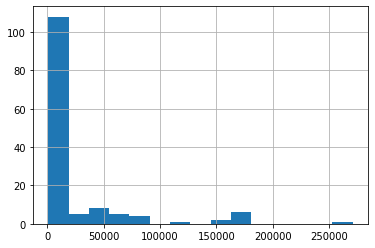

In [10]:
import matplotlib.pyplot as plt
# plt.plot(dfu['acres_burned'])
# plt.ylabel('acres burned')
hist =dfu['acres_burned'].hist(bins=15)

In [11]:
dfu.columns

Index(['date', 'precipitation_amount_mm', 'relative_humidity_%',
       'specific_humidity_kg/kg',
       'surface_downwelling_shortwave_flux_in_air_W m-2',
       'wind_from_direction_Degrees Clockwise from north', 'wind_speed_m/s',
       'max_air_temperature_K', 'min_air_temperature_K',
       'burning_index_g_Unitless', 'dead_fuel_moisture_100hr_Percent',
       'dead_fuel_moisture_1000hr_Percent',
       'energy_release_component-g_Unitless',
       'potential_evapotranspiration_mm', 'mean_vapor_pressure_deficit_kPa',
       'fire_occurred', 'acres_burned', 'fire_name', 'longitude', 'latitude'],
      dtype='object')

In [12]:
# add two more features 
dfu['month'] = dfu.apply(lambda row: row.date.month, axis = 1)
dfu['day']   = dfu.apply(lambda row: row.date.day, axis = 1)

In [13]:
dfu.head()

,date,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,...,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,fire_occurred,acres_burned,fire_name,longitude,latitude,month,day
7818067,2014-05-18,0.0,47.2,0.00934,316.2,237.0,2.5,296.6,289.7,40.0,...,58.0,5.0,0.89,True,1994.790000,San Diego Complex,-117.183333,33.066667,5,18
4480489,2007-10-24,0.0,5.2,0.00200,207.8,294.0,2.7,308.7,289.4,50.0,...,65.0,5.5,3.53,True,84089.805000,Harris,-116.933333,32.691667,10,24
7814035,2014-05-15,0.0,1.0,0.00219,361.9,337.0,2.7,310.4,292.1,53.0,...,71.0,8.4,3.94,True,1331.340000,Bernardo,-117.183333,32.941667,5,15
2711781,2004-05-02,0.0,17.8,0.00507,332.6,4.0,2.8,304.8,290.4,42.0,...,55.0,7.1,2.54,True,8946.074219,EAGLE,-117.100000,33.441667,5,2
4477277,2007-10-22,0.0,5.0,0.00106,211.4,63.0,8.9,298.4,282.1,91.0,...,64.0,8.7,2.03,True,164038.218000,Witch,-116.766667,33.066667,10,22


In [14]:
# as we are examing the severity , remove data,fire name and fire occured and include day & month features 
dfc=dfu.drop(['date','fire_name', 'fire_occurred'], axis=1)
dfc.head()

,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,acres_burned,longitude,latitude,month,day
7818067,0.0,47.2,0.00934,316.2,237.0,2.5,296.6,289.7,40.0,8.1,10.7,58.0,5.0,0.89,1994.790000,-117.183333,33.066667,5,18
4480489,0.0,5.2,0.00200,207.8,294.0,2.7,308.7,289.4,50.0,5.3,12.2,65.0,5.5,3.53,84089.805000,-116.933333,32.691667,10,24
7814035,0.0,1.0,0.00219,361.9,337.0,2.7,310.4,292.1,53.0,4.9,10.8,71.0,8.4,3.94,1331.340000,-117.183333,32.941667,5,15
2711781,0.0,17.8,0.00507,332.6,4.0,2.8,304.8,290.4,42.0,8.7,13.0,55.0,7.1,2.54,8946.074219,-117.100000,33.441667,5,2
4477277,0.0,5.0,0.00106,211.4,63.0,8.9,298.4,282.1,91.0,7.7,11.5,64.0,8.7,2.03,164038.218000,-116.766667,33.066667,10,22


In [15]:
ff=dfc.columns.values
ff

array(['precipitation_amount_mm', 'relative_humidity_%',
       'specific_humidity_kg/kg',
       'surface_downwelling_shortwave_flux_in_air_W m-2',
       'wind_from_direction_Degrees Clockwise from north',
       'wind_speed_m/s', 'max_air_temperature_K', 'min_air_temperature_K',
       'burning_index_g_Unitless', 'dead_fuel_moisture_100hr_Percent',
       'dead_fuel_moisture_1000hr_Percent',
       'energy_release_component-g_Unitless',
       'potential_evapotranspiration_mm',
       'mean_vapor_pressure_deficit_kPa', 'acres_burned', 'longitude',
       'latitude', 'month', 'day'], dtype=object)

In [16]:
dfc.head()

,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,acres_burned,longitude,latitude,month,day
7818067,0.0,47.2,0.00934,316.2,237.0,2.5,296.6,289.7,40.0,8.1,10.7,58.0,5.0,0.89,1994.790000,-117.183333,33.066667,5,18
4480489,0.0,5.2,0.00200,207.8,294.0,2.7,308.7,289.4,50.0,5.3,12.2,65.0,5.5,3.53,84089.805000,-116.933333,32.691667,10,24
7814035,0.0,1.0,0.00219,361.9,337.0,2.7,310.4,292.1,53.0,4.9,10.8,71.0,8.4,3.94,1331.340000,-117.183333,32.941667,5,15
2711781,0.0,17.8,0.00507,332.6,4.0,2.8,304.8,290.4,42.0,8.7,13.0,55.0,7.1,2.54,8946.074219,-117.100000,33.441667,5,2
4477277,0.0,5.0,0.00106,211.4,63.0,8.9,298.4,282.1,91.0,7.7,11.5,64.0,8.7,2.03,164038.218000,-116.766667,33.066667,10,22


In [17]:
y =dfc['acres_burned']

In [18]:

x=dfc.drop(['acres_burned'], axis=1)
x.head()

,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,longitude,latitude,month,day
7818067,0.0,47.2,0.00934,316.2,237.0,2.5,296.6,289.7,40.0,8.1,10.7,58.0,5.0,0.89,-117.183333,33.066667,5,18
4480489,0.0,5.2,0.00200,207.8,294.0,2.7,308.7,289.4,50.0,5.3,12.2,65.0,5.5,3.53,-116.933333,32.691667,10,24
7814035,0.0,1.0,0.00219,361.9,337.0,2.7,310.4,292.1,53.0,4.9,10.8,71.0,8.4,3.94,-117.183333,32.941667,5,15
2711781,0.0,17.8,0.00507,332.6,4.0,2.8,304.8,290.4,42.0,8.7,13.0,55.0,7.1,2.54,-117.100000,33.441667,5,2
4477277,0.0,5.0,0.00106,211.4,63.0,8.9,298.4,282.1,91.0,7.7,11.5,64.0,8.7,2.03,-116.766667,33.066667,10,22


In [86]:
# First look again to the regression problem and choose inner_cs with kfold 
# this helps with tuning parameters and use mean absolute error 
from sklearn import metrics
from sklearn.model_selection import KFold
# To be used within GridSearch (15 in your case) and shuffle to True
inner_cv = KFold(n_splits=7, shuffle=True, random_state=5)
#As alwasy randomforestregressor perfomrs better , tryig to get best parameter for randomforestclassfier 
from sklearn.model_selection import train_test_split
x_train1, x_valid1, y_train1, y_valid1 = train_test_split(x, y, test_size=0.3, random_state=50)
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# parameters = {'n_estimators': [50,100, 200, 300, 1000], 'max_depth' : [5,10,15,20,25],'min_samples_split':[2,6,8], 
#     'min_samples_leaf':[1,7,9,13],'random_state' : [5,20,25,30,35,40] }
parameters = {'n_estimators': [10, 30, 50], 'max_depth' : [5,10,15],'min_samples_split':[2,4], 
    'min_samples_leaf':[1,3],'random_state' : [3,5] }
clf1 =  RandomForestRegressor()
CV_rfc1 = GridSearchCV(clf1 , parameters,scoring= 'neg_mean_absolute_error', cv=inner_cv)
CV_rfc1.fit(x_train1, y_train1)
# y_pred = clf.predict(X_test)
# clf1.fit(x_train1, y_train1)sa 
y_pred1=CV_rfc1.predict(x_valid1)
#accuracy = np.sum(y_pred == y_test)/len(y_test)
#accuracy = accuracy_score(y_pred1, y_valid1)
#cross_val_score(model, features, labels, scoring='accuracy', cv=CV)



In [87]:
# it shows the best paramteres based on gridsearchCV 
# use mean aboulte error for validation accuracy 
vaild_acc = mean_absolute_error(y_valid1, y_pred1)
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy = ' + str(vaild_acc)) 
print (CV_rfc1.best_params_)

Valid accuracy = 18576.02023609401
{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 3}


In [88]:
# Mean squred error
vaild_acc_mse = metrics.mean_squared_error(y_valid1, y_pred1)
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy_mse = ' + str(vaild_acc_mse)) 


Valid accuracy_mse = 876674911.2248735


In [89]:
# Mean squred log error
vaild_acc_mlog = metrics.mean_squared_log_error(y_valid1, y_pred1)
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy_mlog = ' + str(vaild_acc_mlog)) 

Valid accuracy_mlog = 1.9381734088442686


In [90]:
# Median absolute error
vaild_acc_mar = metrics.median_absolute_error(y_valid1, y_pred1)
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy_mar = ' + str(vaild_acc_mar)) 

Valid accuracy_mar = 8054.742122135188


In [91]:

vaild_acc_medianar = metrics.median_absolute_error(y_valid1, y_pred1)
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy_medianar = ' + str(vaild_acc_medianar)) 


Valid accuracy_medianar = 8054.742122135188


In [92]:
# R2 score
vaild_acc_r2 = metrics.r2_score(y_valid1, y_pred1)
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy_r2 = ' + str(vaild_acc_r2)) 


Valid accuracy_r2 = 0.5292238464137877


In [93]:
# Validation accuracy variance score
vaild_acc_vc= metrics.explained_variance_score(y_valid1, y_pred1)
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy_vc = ' + str(vaild_acc_vc)) 


Valid accuracy_vc = 0.5712252169215435


In [94]:
# Max error accuracy
vaild_acc_me = metrics.max_error(y_valid1, y_pred1)
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy_me = ' + str(vaild_acc_me)) 


Valid accuracy_me = 88889.15452532077


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-

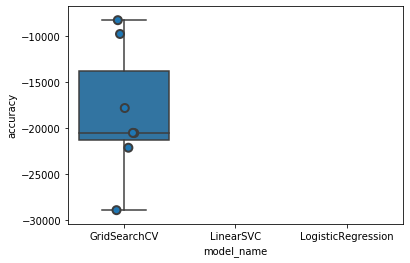

model_name
GridSearchCV         -18298.911417
LinearSVC                      NaN
LogisticRegression             NaN
Name: accuracy, dtype: float64

In [96]:
# Try and check mulitple classifier 
features =x
labels=y

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import KFold
# To be used within GridSearch (15 in your case) and shuffle to True
inner_cv = KFold(n_splits=7, shuffle=True, random_state=5)
features =x
labels =y

from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [CV_rfc1,
    LinearSVC(),
    LogisticRegression(),
]
d=3
cv_df = pd.DataFrame(index=range(d* len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='neg_mean_absolute_error', cv=inner_cv)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

cv_df.groupby('model_name').accuracy.mean()

In [179]:
dfu.shape

(140, 22)

In [19]:
dfm=dfu
p1= 1058
p2=3000
p3=14000
# p1= 1058
# p2=50000
# p3=150000
c0=dfm['acres_burned']>p1
c1=dfm['acres_burned'] <=p2
c2=dfm['acres_burned'] >p2
c3 = dfm['acres_burned'] <=p3
c4 =dfm['acres_burned'] > p3
# c5=dfm['acres_burned'] <= 85468
# c6=dfm['acres_burned'] >85468
# c7=dfm['acres_burned'] <= 163000
# c8=dfm['acres_burned'] >163000
dfm1= dfm[c0 & c1]
dfm2=dfm[c2 & c3]
dfm3=dfm[c4]
#dfm_4 =dfm[c6 & c7]
#dfm_4 =dfm[c8]

In [20]:
print(dfm1.count()[1])
print(dfm2.count()[1])
print(dfm3.count()[1])

52
48
40


In [21]:
dfm1['label'] = 0
dfm2['label'] = 1
dfm3['label'] = 2
dfmt=pd.concat([dfm1, dfm2,dfm3])
dfmt.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,date,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,...,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,fire_occurred,acres_burned,fire_name,longitude,latitude,month,day,label
7818067,2014-05-18,0.0,47.2,0.00934,316.2,237.0,2.5,296.6,289.7,40.0,...,5.0,0.89,True,1994.790000,San Diego Complex,-117.183333,33.066667,5,18,0
7814035,2014-05-15,0.0,1.0,0.00219,361.9,337.0,2.7,310.4,292.1,53.0,...,8.4,3.94,True,1331.340000,Bernardo,-117.183333,32.941667,5,15,0
4421938,2007-09-12,0.0,17.9,0.00559,270.6,260.0,3.8,306.9,287.9,57.0,...,7.2,2.68,True,2111.768066,PINE,-116.558333,32.775000,9,12,0
7321186,2013-05-26,0.0,15.2,0.00333,338.6,252.0,3.9,294.4,277.3,62.0,...,5.9,1.21,True,1270.865967,GENERAL,-116.558333,33.025000,5,26,0
7816282,2014-05-17,0.0,40.7,0.00904,329.5,219.0,3.4,299.0,287.9,42.0,...,5.6,1.05,True,1456.110000,Basilone Complex,-117.558333,33.400000,5,17,0


In [22]:
dfmt.shape

(140, 23)

In [23]:

y=dfmt['label'].values
x=dfmt.drop(['label','acres_burned','fire_name','fire_occurred','date'], axis=1)


In [25]:
# this helps with tuning parameters and use mean absolute error 
from sklearn.model_selection import KFold
# To be used within GridSearch (5 in your case)
inner_cv = KFold(n_splits=7, shuffle=True, random_state=5)

# To be used in outer CV (you asked for 10)
outer_cv = KFold(n_splits=7, shuffle=True, random_state=5)
import pickle
from sklearn import metrics
#As alwasy randomforestregressor perfomrs better , tryig to get best parameter for randomforestclassfier 
from sklearn.model_selection import train_test_split
x_train1, x_valid1, y_train1, y_valid1 = train_test_split(x, y, test_size=0.3, random_state=50)
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# parameters = {'n_estimators': [50,100, 200, 300, 1000], 'max_depth' : [5,10,15,20,25],'min_samples_split':[2,6,8], 
#     'min_samples_leaf':[1,7,9,13],'random_state' : [5,20,25,30,35,40] }
parameters = {'n_estimators': [20, 50,100], 'max_depth' : [5,10, 15,20],'min_samples_split':[2,4,6], 
    'min_samples_leaf':[1,3,7],'random_state' : [5,20,25] }
clf1 = RandomForestClassifier(criterion='gini')
CV_rfc1 = GridSearchCV(clf1 , parameters,scoring= 'f1_micro', cv = inner_cv)
CV_rfc1.fit(x_train1, y_train1)
filename = 'finalized_model.sav'
pickle.dump(CV_rfc1, open(filename, 'wb'))
# y_pred = clf.predict(X_test)
# clf1.fit(x_train1, y_train1)sa 
y_pred1=CV_rfc1.predict(x_valid1)
#accuracy = np.sum(y_pred == y_test)/len(y_test)
#accuracy = accuracy_score(y_pred1, y_valid1)
#cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
vaild_acc = metrics.f1_score(y_valid1, y_pred1, average='micro')
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy = ' + str(vaild_acc)) 
print (CV_rfc1.best_params_)



Valid accuracy = 0.5952380952380952
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 20, 'random_state': 5}


In [26]:
# Classifciation report 
from sklearn.metrics import classification_report
vaild_acc2 = classification_report(y_valid1, y_pred1)
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy = ' + str(vaild_acc2)) 

Valid accuracy =               precision    recall  f1-score   support

           0       0.60      0.38      0.46        16
           1       0.40      0.46      0.43        13
           2       0.76      1.00      0.87        13

    accuracy                           0.60        42
   macro avg       0.59      0.61      0.59        42
weighted avg       0.59      0.60      0.58        42



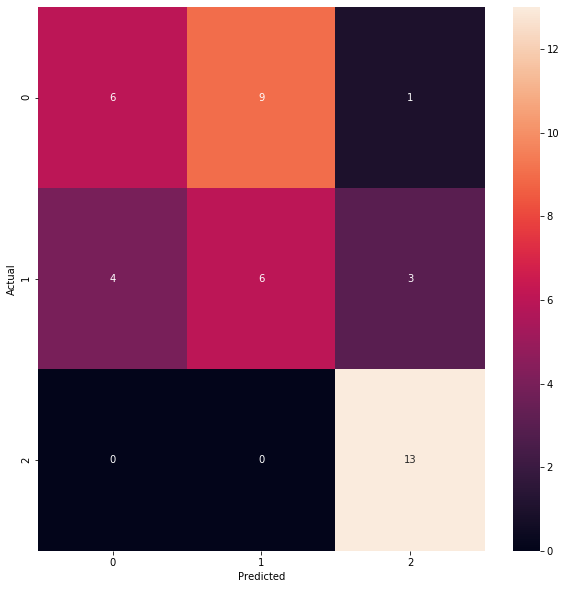

In [28]:
# Confusion matrix 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_valid1, y_pred1)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

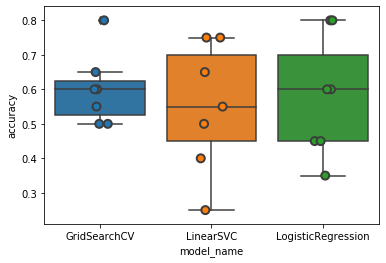

model_name
GridSearchCV          0.600000
LinearSVC             0.550000
LogisticRegression    0.578571
Name: accuracy, dtype: float64

In [140]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    CV_rfc1,
    LinearSVC(),
    LogisticRegression(),
]
d= 3
cv_df = pd.DataFrame(index=range(d * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='f1_micro', cv=inner_cv)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

cv_df.groupby('model_name').accuracy.mean()

In [42]:
# Try with choosing randomly 140 fires from total fires but choose differetn buket to resolve class imbalance
# Run it multiple times to address class imblance 
dfr= dff.sample(n=140)
# add two more features 
dfr['month'] = dfr.apply(lambda row: row.date.month, axis = 1)
dfr['day']   = dfr.apply(lambda row: row.date.day, axis = 1)
# as we are examing the severity , remove data,fire name and fire occured and include day & month features 
dfc=dfr.drop(['date','fire_name', 'fire_occurred'], axis=1)
y =dfc['acres_burned']
x=dfc.drop(['acres_burned'], axis=1)
dfm=dfr
p1= 1058
p2=50000
p3=150000
c0=dfm['acres_burned']>p1
c1=dfm['acres_burned'] <=p2
c2=dfm['acres_burned'] >p2
c3 = dfm['acres_burned'] <=p3
c4 =dfm['acres_burned'] > p3
# c5=dfm['acres_burned'] <= 85468
# c6=dfm['acres_burned'] >85468
# c7=dfm['acres_burned'] <= 163000
# c8=dfm['acres_burned'] >163000
dfm1= dfm[c0 & c1]
dfm2=dfm[c2 & c3]
dfm3=dfm[c4]
#dfm_4 =dfm[c6 & c7]
#dfm_4 =dfm[c8]

In [43]:
print(dfm1.count()[1])
print(dfm2.count()[1])
print(dfm3.count()[1])

59
32
49


In [44]:
dfm1['label'] = 0
dfm2['label'] = 1
dfm3['label'] = 2
dfmt=pd.concat([dfm1, dfm2,dfm3])
dfmt.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,date,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,...,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,fire_occurred,acres_burned,fire_name,longitude,latitude,month,day,label
9632994,2017-12-12,0.0,17.8,0.00512,148.9,60.0,3.5,300.5,282.7,44.0,...,3.9,1.59,True,4080.614707,LILAC 5,-117.225000,33.275000,12,12,0
7505919,2013-10-06,0.0,19.8,0.00617,238.1,114.0,2.8,302.0,287.7,37.0,...,4.9,1.84,True,2755.350000,Deluz,-117.350000,33.358333,10,6,0
6919853,2012-08-11,1.8,21.5,0.01186,274.5,180.0,2.6,312.3,294.6,0.0,...,6.9,3.07,True,2024.520000,Chihuahua 2,-116.766667,33.400000,8,11,0
6810275,2012-05-24,0.0,17.1,0.00529,347.6,237.0,4.0,302.1,281.3,70.0,...,7.2,1.76,True,5320.115723,BANNER FIRE,-116.516667,33.066667,5,24,0
6381251,2011-07-21,0.0,6.6,0.00292,320.7,260.0,4.0,303.6,288.3,78.0,...,8.0,2.64,True,13992.992188,EAGLE,-116.516667,33.316667,7,21,0


In [45]:
y=dfmt['label'].values
x=dfmt.drop(['label','acres_burned','fire_name','fire_occurred','date'], axis=1)

In [47]:
# this helps with tuning parameters and use mean absolute error 
from sklearn.model_selection import KFold
# To be used within GridSearch (5 in your case)
inner_cv = KFold(n_splits=7, shuffle=True, random_state=5)

# To be used in outer CV (you asked for 10)
outer_cv = KFold(n_splits=7, shuffle=True, random_state=5)
import pickle
from sklearn import metrics
#As alwasy randomforestregressor perfomrs better , tryig to get best parameter for randomforestclassfier 
from sklearn.model_selection import train_test_split
x_train1, x_valid1, y_train1, y_valid1 = train_test_split(x, y, test_size=0.3, random_state=50)
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# parameters = {'n_estimators': [50,100, 200, 300, 1000], 'max_depth' : [5,10,15,20,25],'min_samples_split':[2,6,8], 
#     'min_samples_leaf':[1,7,9,13],'random_state' : [5,20,25,30,35,40] }
parameters = {'n_estimators': [20, 50,100], 'max_depth' : [5,10, 15,20],'min_samples_split':[2,4,6], 
    'min_samples_leaf':[1,3,7],'random_state' : [5,20,25] }
clf1 = RandomForestClassifier(criterion='gini')
CV_rfc1 = GridSearchCV(clf1 , parameters,scoring= 'f1_micro', cv = inner_cv)
CV_rfc1.fit(x_train1, y_train1)
filename = 'finalized_model.sav'
pickle.dump(CV_rfc1, open(filename, 'wb'))
# y_pred = clf.predict(X_test)
# clf1.fit(x_train1, y_train1)sa 
y_pred1=CV_rfc1.predict(x_valid1)
#accuracy = np.sum(y_pred == y_test)/len(y_test)
#accuracy = accuracy_score(y_pred1, y_valid1)
#cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
vaild_acc = metrics.f1_score(y_valid1, y_pred1, average='micro')
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy = ' + str(vaild_acc)) 
print (CV_rfc1.best_params_)

Valid accuracy = 0.8571428571428571
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20, 'random_state': 5}


In [48]:
# Classifciation report 
from sklearn.metrics import classification_report
vaild_acc2 = classification_report(y_valid1, y_pred1)
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy = ' + str(vaild_acc2)) 

Valid accuracy =               precision    recall  f1-score   support

           0       1.00      0.74      0.85        19
           1       0.90      0.90      0.90        10
           2       0.72      1.00      0.84        13

    accuracy                           0.86        42
   macro avg       0.87      0.88      0.86        42
weighted avg       0.89      0.86      0.86        42



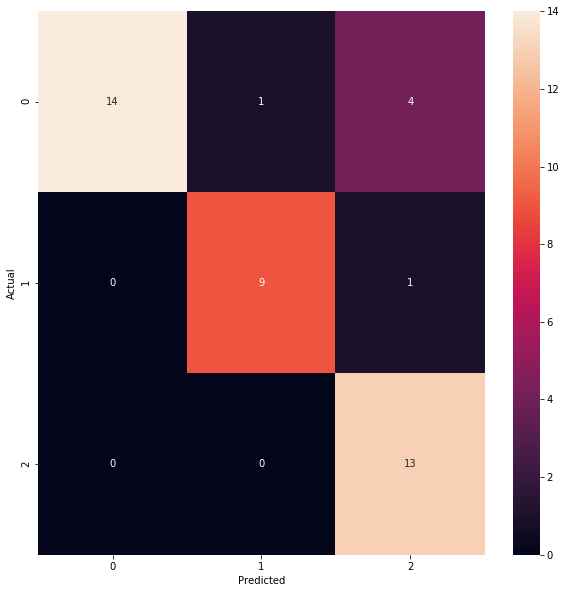

In [49]:
# Confusion matrix 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_valid1, y_pred1)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [51]:
# This time, we will use the second buket of classificaiton that used for random samples for unique fires and see the results
# it will suffer from class imbalance as more fire at first buket 
dfm=dfu
# p1= 1058
# p2=3000
# p3=14000
p1= 1058
p2=50000
p3=150000
c0=dfm['acres_burned']>p1
c1=dfm['acres_burned'] <=p2
c2=dfm['acres_burned'] >p2
c3 = dfm['acres_burned'] <=p3
c4 =dfm['acres_burned'] > p3
# c5=dfm['acres_burned'] <= 85468
# c6=dfm['acres_burned'] >85468
# c7=dfm['acres_burned'] <= 163000
# c8=dfm['acres_burned'] >163000
dfm1= dfm[c0 & c1]
dfm2=dfm[c2 & c3]
dfm3=dfm[c4]
#dfm_4 =dfm[c6 & c7]
#dfm_4 =dfm[c8]
print(dfm1.count()[1])
print(dfm2.count()[1])
print(dfm3.count()[1])


119
12
9


In [52]:
dfm1['label'] = 0
dfm2['label'] = 1
dfm3['label'] = 2
dfmt=pd.concat([dfm1, dfm2,dfm3])
dfmt.head()


y=dfmt['label'].values
x=dfmt.drop(['label','acres_burned','fire_name','fire_occurred','date'], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [53]:
# this helps with tuning parameters and use mean absolute error 
from sklearn.model_selection import KFold
# To be used within GridSearch (5 in your case)
inner_cv = KFold(n_splits=7, shuffle=True, random_state=5)

# To be used in outer CV (you asked for 10)
outer_cv = KFold(n_splits=7, shuffle=True, random_state=5)
import pickle
from sklearn import metrics
#As alwasy randomforestregressor perfomrs better , tryig to get best parameter for randomforestclassfier 
from sklearn.model_selection import train_test_split
x_train1, x_valid1, y_train1, y_valid1 = train_test_split(x, y, test_size=0.3, random_state=50)
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# parameters = {'n_estimators': [50,100, 200, 300, 1000], 'max_depth' : [5,10,15,20,25],'min_samples_split':[2,6,8], 
#     'min_samples_leaf':[1,7,9,13],'random_state' : [5,20,25,30,35,40] }
parameters = {'n_estimators': [20, 50,100], 'max_depth' : [5,10, 15,20],'min_samples_split':[2,4,6], 
    'min_samples_leaf':[1,3,7],'random_state' : [5,20,25] }
clf1 = RandomForestClassifier(criterion='gini')
CV_rfc1 = GridSearchCV(clf1 , parameters,scoring= 'f1_micro', cv = inner_cv)
CV_rfc1.fit(x_train1, y_train1)
filename = 'finalized_model.sav'
pickle.dump(CV_rfc1, open(filename, 'wb'))
# y_pred = clf.predict(X_test)
# clf1.fit(x_train1, y_train1)sa 
y_pred1=CV_rfc1.predict(x_valid1)
#accuracy = np.sum(y_pred == y_test)/len(y_test)
#accuracy = accuracy_score(y_pred1, y_valid1)
#cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
vaild_acc = metrics.f1_score(y_valid1, y_pred1, average='micro')
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy = ' + str(vaild_acc)) 
print (CV_rfc1.best_params_)



Valid accuracy = 0.8809523809523809
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 20, 'random_state': 20}


Valid accuracy =               precision    recall  f1-score   support

           0       0.90      1.00      0.95        37
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         1

    accuracy                           0.88        42
   macro avg       0.30      0.33      0.32        42
weighted avg       0.80      0.88      0.84        42



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


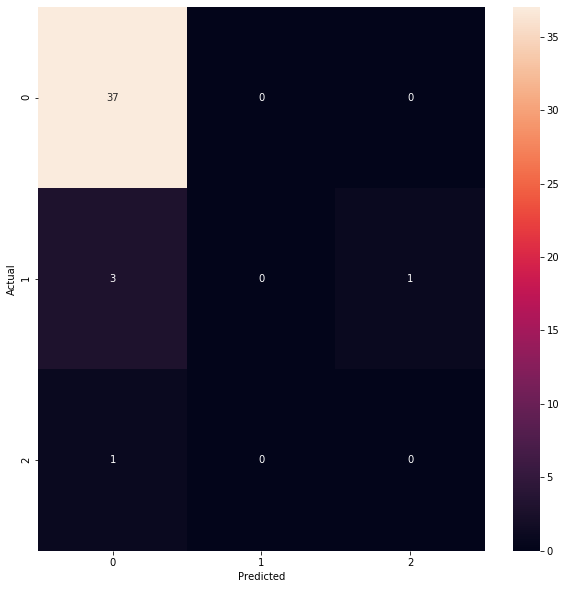

In [54]:

# Classifciation report 
from sklearn.metrics import classification_report
vaild_acc2 = classification_report(y_valid1, y_pred1)
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy = ' + str(vaild_acc2)) 


# Confusion matrix 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_valid1, y_pred1)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

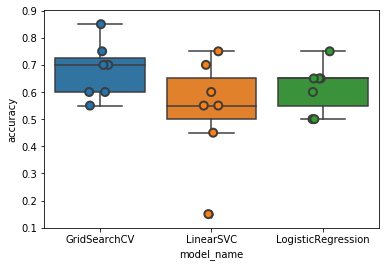

model_name
GridSearchCV          0.678571
LinearSVC             0.535714
LogisticRegression    0.614286
Name: accuracy, dtype: float64

In [55]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    CV_rfc1,
    LinearSVC(),
    LogisticRegression(),
]
d= 3
cv_df = pd.DataFrame(index=range(d * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='f1_micro', cv=inner_cv)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

cv_df.groupby('model_name').accuracy.mean()





In [66]:
# Back to Random samples of 140 fires but used first buket that unique fires are used 
# Try with choosing randomly 140 fires from total fires but choose differetn buket to resolve class imbalance
# Run it multiple times to address class imblance 
dfr= dff.sample(n=140)
# add two more features 
dfr['month'] = dfr.apply(lambda row: row.date.month, axis = 1)
dfr['day']   = dfr.apply(lambda row: row.date.day, axis = 1)
# as we are examing the severity , remove data,fire name and fire occured and include day & month features 
dfc=dfr.drop(['date','fire_name', 'fire_occurred'], axis=1)
y =dfc['acres_burned']
x=dfc.drop(['acres_burned'], axis=1)
dfm=dfr
# p1= 1058
# p2=50000
# p3=150000
p1= 1058
p2=3000
p3=14000
c0=dfm['acres_burned']>p1
c1=dfm['acres_burned'] <=p2
c2=dfm['acres_burned'] >p2
c3 = dfm['acres_burned'] <=p3
c4 =dfm['acres_burned'] > p3
# c5=dfm['acres_burned'] <= 85468
# c6=dfm['acres_burned'] >85468
# c7=dfm['acres_burned'] <= 163000
# c8=dfm['acres_burned'] >163000
dfm1= dfm[c0 & c1]
dfm2=dfm[c2 & c3]
dfm3=dfm[c4]
#dfm_4 =dfm[c6 & c7]
#dfm_4 =dfm[c8]

print(dfm1.count()[1])
print(dfm2.count()[1])
print(dfm3.count()[1])


20
23
97


In [67]:
dfm1['label'] = 0
dfm2['label'] = 1
dfm3['label'] = 2
dfmt=pd.concat([dfm1, dfm2,dfm3])
dfmt.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,date,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,...,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,fire_occurred,acres_burned,fire_name,longitude,latitude,month,day,label
6919902,2012-08-11,2.5,23.0,0.01198,273.5,33.0,2.6,311.0,294.9,0.0,...,6.8,2.85,True,2024.520000,Chihuahua 2,-116.725000,33.358333,8,11,0
6919854,2012-08-11,2.6,22.7,0.01166,272.0,37.0,2.6,310.8,295.4,0.0,...,6.8,2.91,True,2024.520000,Chihuahua 2,-116.725000,33.400000,8,11,0
6980631,2012-09-23,0.0,13.5,0.00641,238.6,283.0,2.7,306.6,285.9,47.0,...,5.7,2.40,True,2555.588623,SHOCKEY,-116.350000,32.608333,9,23,0
7507311,2013-10-07,0.0,27.1,0.00699,218.9,318.0,1.9,299.9,287.5,32.0,...,3.8,1.46,True,2227.720000,Deluz,-117.350000,33.358333,10,7,0
4421987,2007-09-12,0.0,16.5,0.00541,269.4,265.0,3.6,307.6,287.9,57.0,...,7.2,2.80,True,2111.768066,PINE,-116.516667,32.733333,9,12,0


In [68]:

y=dfmt['label'].values
x=dfmt.drop(['label','acres_burned','fire_name','fire_occurred','date'], axis=1)

In [69]:

# this helps with tuning parameters and use mean absolute error 
from sklearn.model_selection import KFold
# To be used within GridSearch (5 in your case)
inner_cv = KFold(n_splits=7, shuffle=True, random_state=5)

# To be used in outer CV (you asked for 10)
outer_cv = KFold(n_splits=7, shuffle=True, random_state=5)
import pickle
from sklearn import metrics
#As alwasy randomforestregressor perfomrs better , tryig to get best parameter for randomforestclassfier 
from sklearn.model_selection import train_test_split
x_train1, x_valid1, y_train1, y_valid1 = train_test_split(x, y, test_size=0.3, random_state=50)
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# parameters = {'n_estimators': [50,100, 200, 300, 1000], 'max_depth' : [5,10,15,20,25],'min_samples_split':[2,6,8], 
#     'min_samples_leaf':[1,7,9,13],'random_state' : [5,20,25,30,35,40] }
parameters = {'n_estimators': [20, 50,100], 'max_depth' : [5,10, 15,20],'min_samples_split':[2,4,6], 
    'min_samples_leaf':[1,3,7],'random_state' : [5,20,25] }
clf1 = RandomForestClassifier(criterion='gini')
CV_rfc1 = GridSearchCV(clf1 , parameters,scoring= 'f1_micro', cv = inner_cv)
CV_rfc1.fit(x_train1, y_train1)
filename = 'finalized_model.sav'
pickle.dump(CV_rfc1, open(filename, 'wb'))
# y_pred = clf.predict(X_test)
# clf1.fit(x_train1, y_train1)sa 
y_pred1=CV_rfc1.predict(x_valid1)
#accuracy = np.sum(y_pred == y_test)/len(y_test)
#accuracy = accuracy_score(y_pred1, y_valid1)
#cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
vaild_acc = metrics.f1_score(y_valid1, y_pred1, average='micro')
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy = ' + str(vaild_acc)) 
print (CV_rfc1.best_params_)


Valid accuracy = 0.7142857142857143
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 20}


In [70]:

# Classifciation report 
from sklearn.metrics import classification_report
vaild_acc2 = classification_report(y_valid1, y_pred1)
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy = ' + str(vaild_acc2)) 

Valid accuracy =               precision    recall  f1-score   support

           0       0.67      0.25      0.36         8
           1       0.29      0.67      0.40         6
           2       0.96      0.86      0.91        28

    accuracy                           0.71        42
   macro avg       0.64      0.59      0.56        42
weighted avg       0.81      0.71      0.73        42



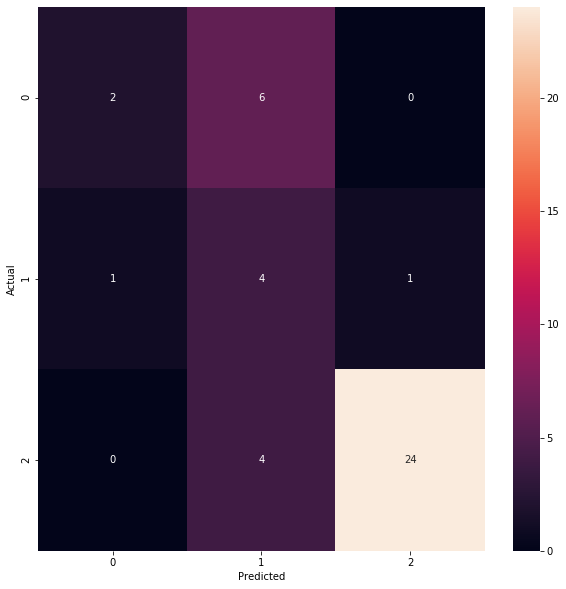

In [71]:
# Confusion matrix 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_valid1, y_pred1)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()